In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import tqdm

from geopandas import GeoDataFrame
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score
from shapely.geometry import Point

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score
import geopandas as gpd

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
mo_gdf = gpd.read_file('atd/mo.shp')
mo_gdf.head()


,NAME,OKATO,OKTMO,NAME_AO,OKATO_AO,ABBREV_AO,TYPE_MO,geometry
0,Киевский,45298555,45945000,Троицкий,45298000,Троицкий,Поселение,"(POLYGON ((36.8031012 55.4408329, 36.8031903 5..."
1,Филёвский Парк,45268595,45328000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.4276499 55.7482092, 37.4284863 55..."
2,Новофёдоровское,45298567,45954000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.8035692 55.4516224, 36.8045117 55..."
3,Роговское,45298575,45956000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.9372397 55.2413907, 36.9372604 55..."
4,"""Мосрентген""",45297568,45953000,Новомосковский,45297000,Новомосковский,Поселение,"POLYGON ((37.4395575 55.6273129, 37.4401803 55..."


In [84]:
data = pd.read_excel('geo.xlsx') #импорт данных голосований

In [85]:
#разделяем данные по результату голосования
data_agreed = data[data.comment_class==1].drop('comment_class', axis=1) 
data_decline = data[data.comment_class==-1].drop('comment_class', axis=1)

In [86]:
#оставляем только координаты
data_coords = data[['x','y']]
data_agreed_coords = data_agreed[['x','y']]
data_decline_coords = data_decline[['x','y']]

#преобразовываем чтобы можно было отобразить
data_coords_arr = np.array(data_coords)
data_agreed_coords_arr = np.array(data_agreed_coords)
data_decline_coords_arr = np.array(data_decline_coords)

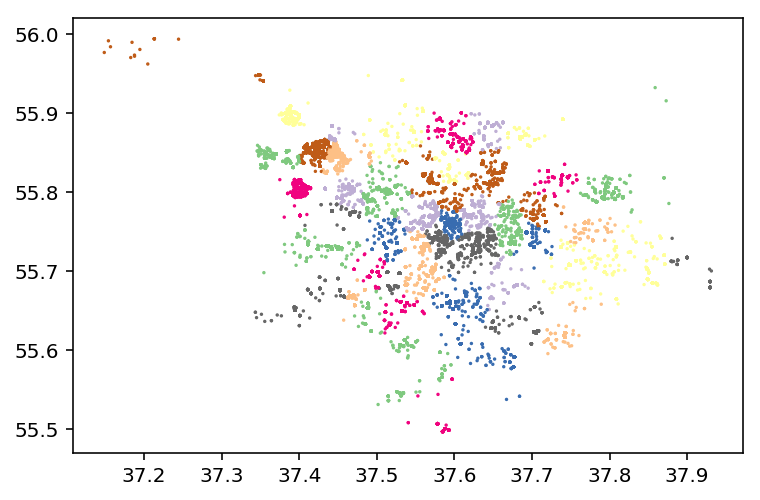

In [101]:
#отображаем кластеры по всем данным
clusters_all_data = KMeans(n_clusters=50).fit_predict(data_coords_arr)
plt.scatter(data_coords_arr[:, 0], data_coords_arr[:, 1], c=clusters_all_data, cmap='Accent', s=0.5)

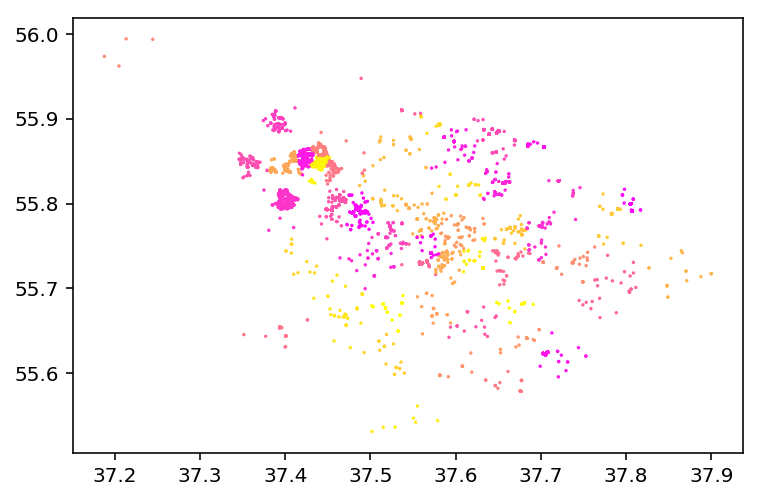

In [89]:
#отображаем кластеры по положительным решениям
clusters = KMeans(n_clusters=50).fit_predict(data_agreed_coords_arr)
plt.scatter(data_agreed_coords_arr[:, 0], data_agreed_coords_arr[:, 1], c=clusters, cmap='spring', s=0.5)

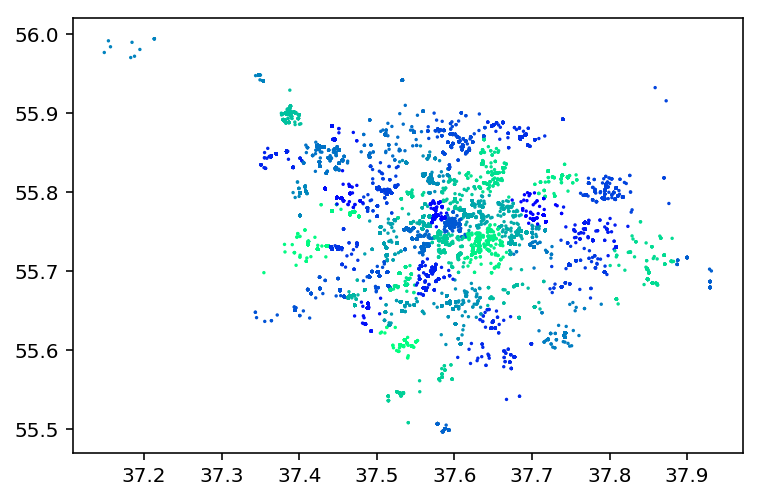

In [90]:
#отображаем кластеры по отрицательным решениям
clusters = KMeans(n_clusters=50).fit_predict(data_decline_coords_arr)
plt.scatter(data_decline_coords_arr[:, 0], data_decline_coords_arr[:, 1], c=clusters, cmap='winter', s=0.5)

In [91]:
#определение оптимальнго числа кластеров
k_inertia = []
ks = range(10,90)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_coords_arr, )
    k_inertia.append(clf_kmeans.inertia_)

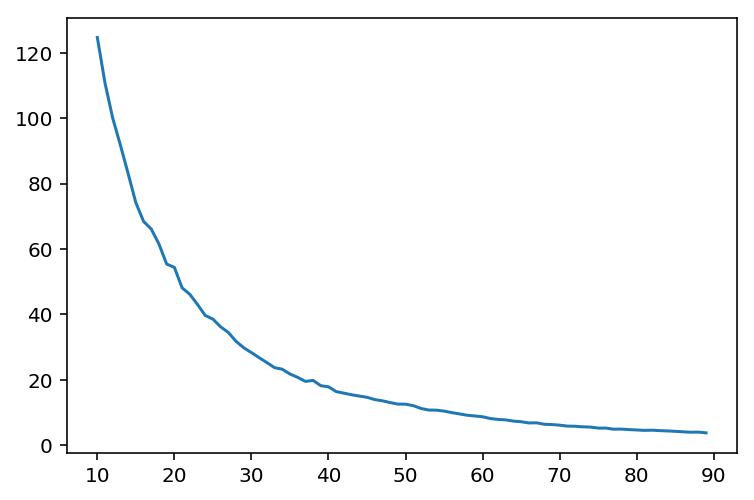

In [92]:
plt.plot(ks, k_inertia)

In [97]:
#подготовим данные чтобы вывести их на карту
crs = {'init': 'epsg:3857'}
geometry = [Point(xy) for xy in zip(data.x, data.y)]
gdf = GeoDataFrame(data, crs=crs, geometry=geometry)
gdf_agreed = gdf[data.comment_class==1].drop(['x','y','comment_class'], axis=1)
gdf_decline = gdf[data.comment_class==-1].drop(['x','y','comment_class'], axis=1)

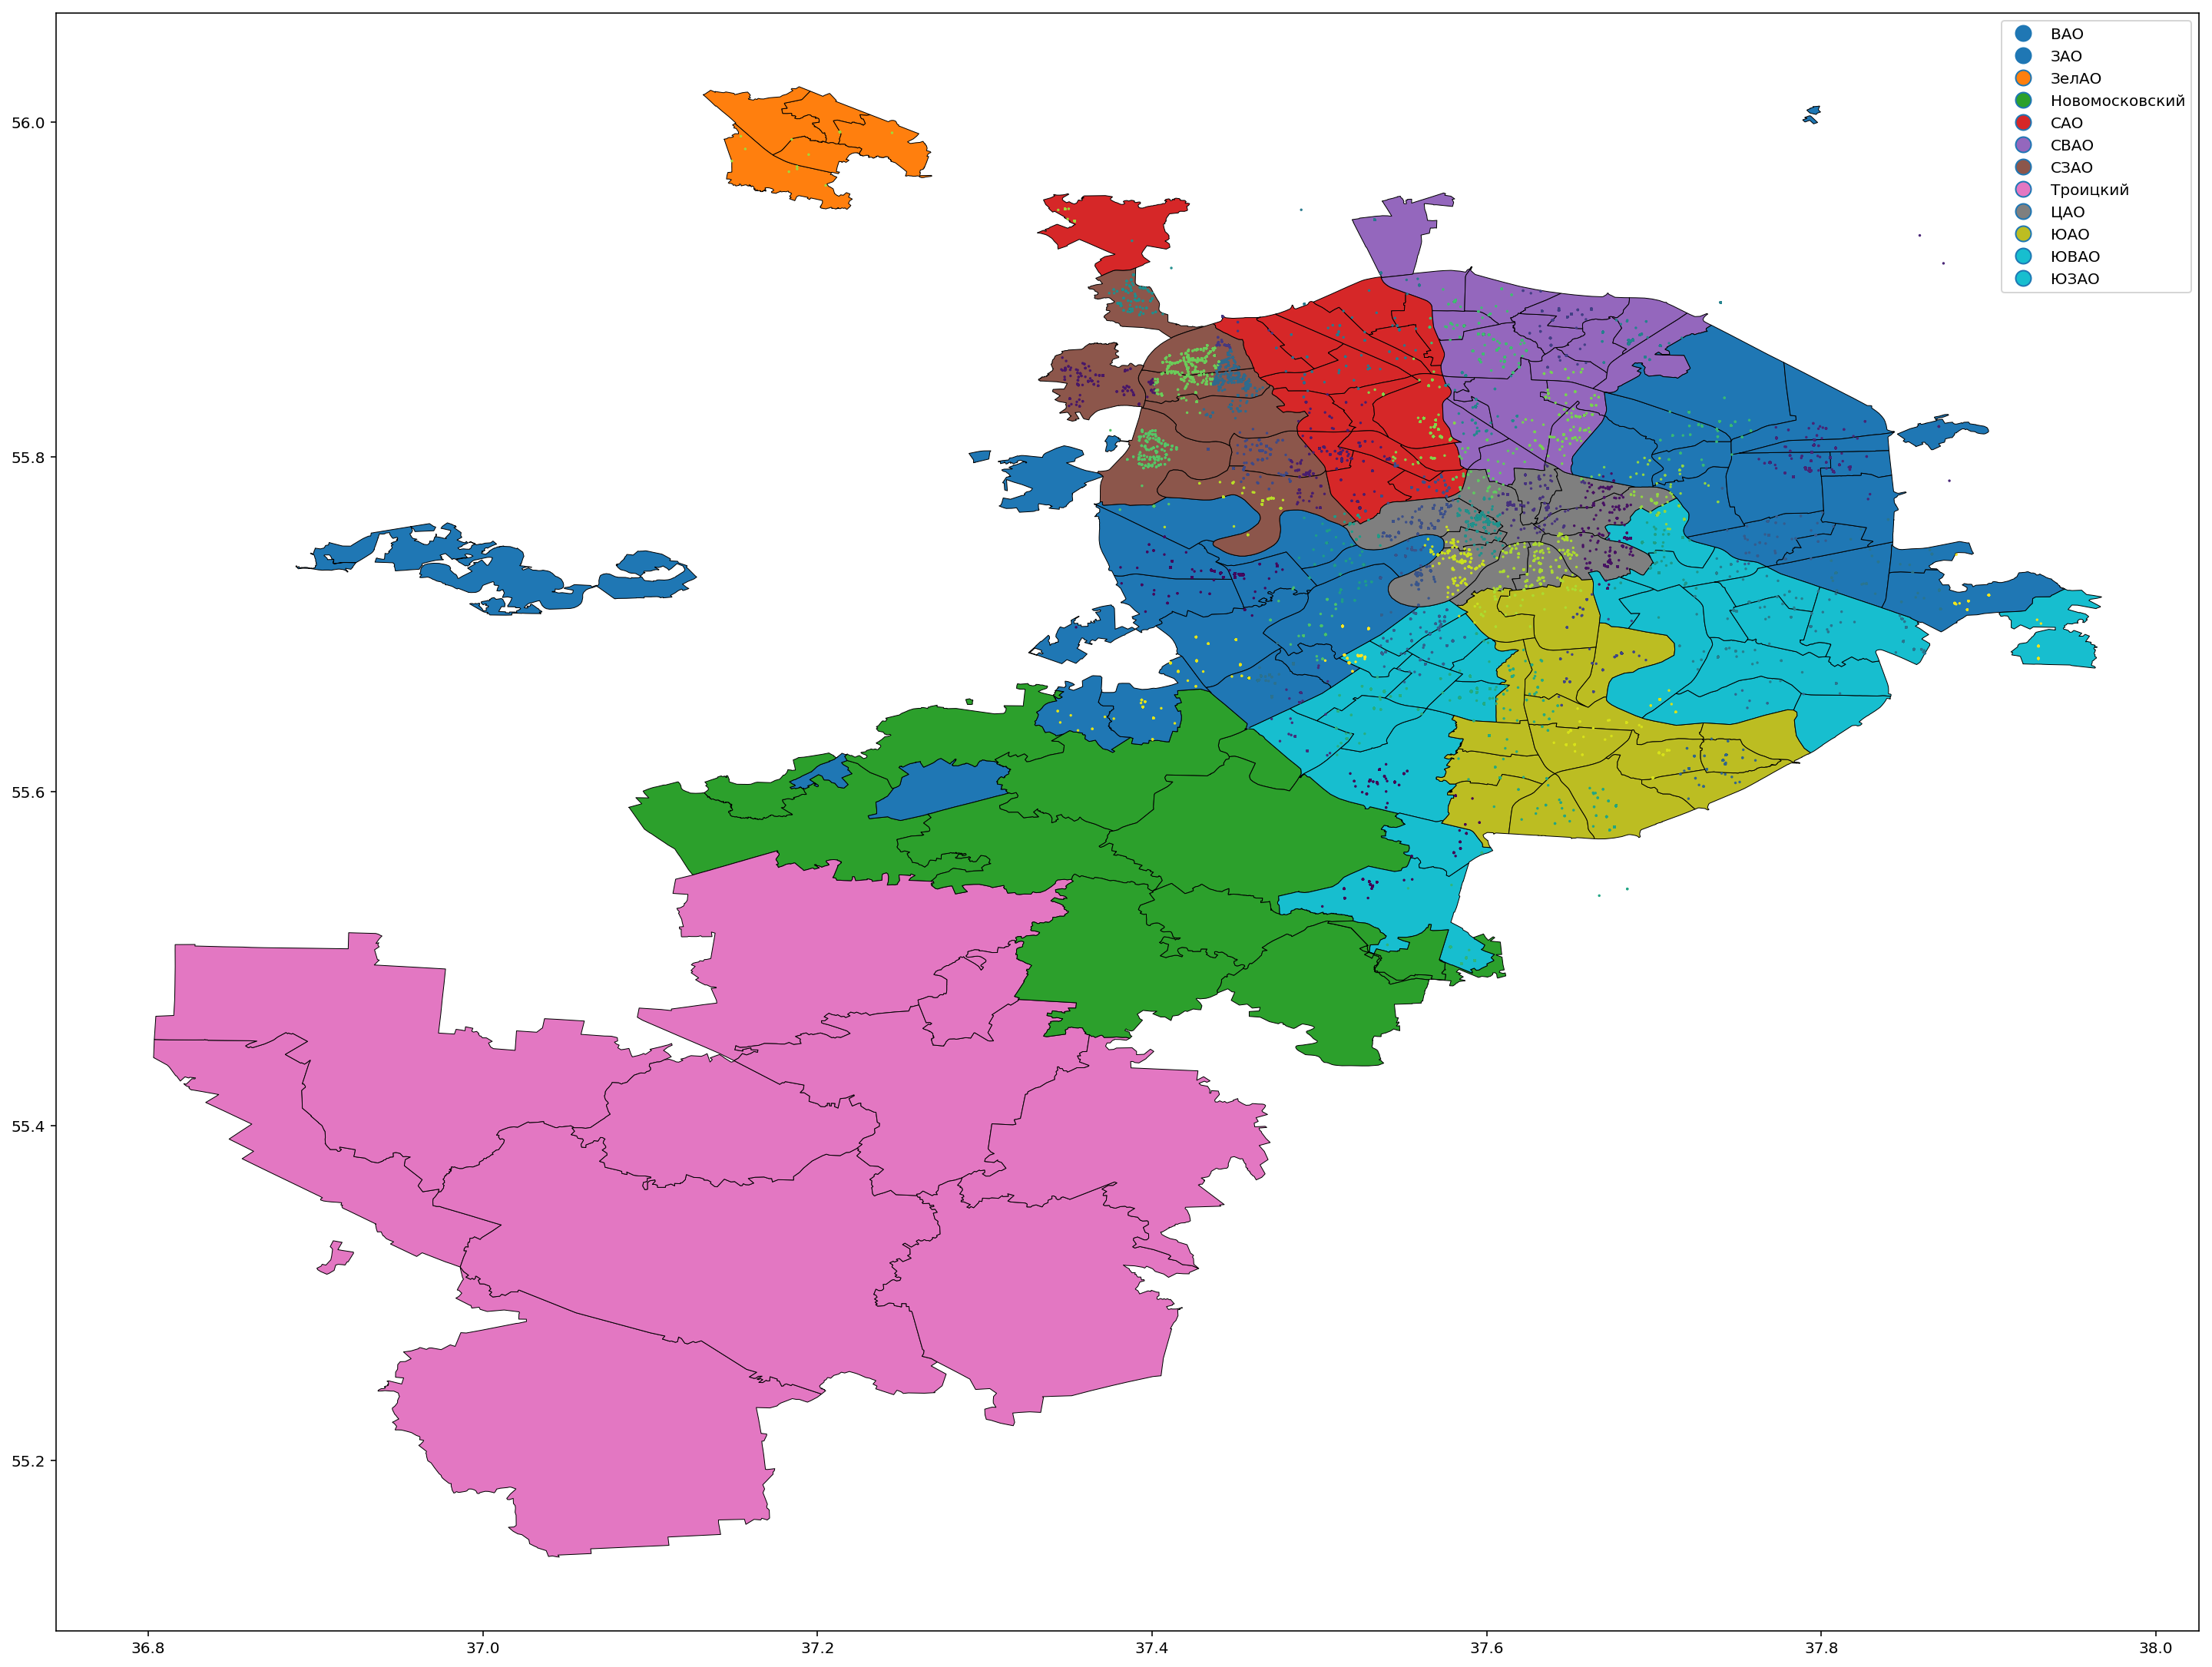

In [102]:
#отобразим данные на карте районов Москвы
base = mo_gdf.plot( edgecolor='black', column = 'ABBREV_AO', linewidth=0.5,legend=True,figsize=[25,25])
gdf.plot(ax=base, marker='o', markersize=0.5, c = clusters_all_data);